## Behavior of Urban Traffic of the City São Paulo

### Dados do dataset e análise

Dataset de dados públicos disponível no link abaixo:
https://archive-beta.ics.uci.edu/ml/datasets/behavior+of+the+urban+traffic+of+the+city+of+sao+paulo+in+brazil

Dataset contém dados coletados no período de 14/12/2009 a 18/12/2009, dados foram registrados de 07:00 à 20:00 a cada 30 minutos.

Informações sobre as instâncias do dataset

1.	Hour
2.	Immobilized bus
3.	Broken Truck
4.	Vehicle excess
5.	Accident victim
6.	Running over
7.	Fire Vehicles
8.	Occurrence involving freight
9.	Incident involving dangerous freight
10.	Lack of electricity
11.	Fire
12.	Point of flooding
13.	Manifestations
14.	Defect in the network of trolleybuses
15.	Tree on the road
16.	Semaphore off
17.	Intermittent Semaphore
18.	Slowness in traffic (%) (Target)

In [1]:
#!pip install --upgrade google-cloud-bigquery
#!pip install db-dtypes
#!pip install statsmodels

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Import da lib google cloud e realizando a leitura das credenciais da Conta de Serviço
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file('./Projeto_python_bq/python-api-gads-5adb7d92600d.json')

In [4]:
# Conectando com o id do projeto 
project_id = 'python-api-gads'
client = bigquery.Client(credentials = credentials, project = project_id)

In [5]:
# Query na tabela do BigQuery e print do resultado de linhas
query_job = client.query("""
SELECT * from `python-api-gads.python_datasets.urban_traffic_behavior_in_sp`""")
results = query_job.result()
print("Total rows available: ", results.total_rows)

Total rows available:  135


In [6]:
# Transformando os resultados em dataframe
df = results.to_dataframe()

In [7]:
data = pd.DataFrame(df)

In [8]:
data.dtypes

Hour_coded_                                Int64
Immobilized_bus                            Int64
Broken_Truck                               Int64
Vehicle_excess                             Int64
Accident_victim                            Int64
Running_over                               Int64
Fire_vehicles                              Int64
Occurrence_involving_freight               Int64
Incident_involving_dangerous_freight       Int64
Lack_of_electricity                        Int64
Fire                                       Int64
Point_of_flooding                          Int64
Manifestations                             Int64
Defect_in_the_network_of_trolleybuses      Int64
Tree_on_the_road                           Int64
Semaphore_off                              Int64
Intermittent_Semaphore                     Int64
Slowness_in_traffic_percent              float64
dtype: object

In [9]:
data.head()

,Hour_coded_,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,49.0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,34.0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,4.0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,8,0,1,0,34.0


In [10]:
# Gerando número de observações e variáveis
observations = len(data)
variables = data.columns[:-1]

In [11]:
X = data.iloc[:,:-1]
y = data['Slowness_in_traffic_percent'].values

In [12]:
# print das variáveis exploratórias 
X.head()

,Hour_coded_,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,8,0,1,0


In [13]:
# Variável target
y

array([ 41.,  49.,  34.,   4.,  34.,  66.,  63.,   5.,   5.,  87.,   8.,
        57.,  92.,  95.,  56., 111.,  85., 109.,  95.,  76.,  83.,  76.,
        82.,  77.,  66.,  76.,  83.,  64.,  85.,  52.,  74.,  82., 103.,
        48.,  81.,  53.,   8., 109.,  69.,  51.,  94.,  67., 113.,  81.,
        13., 121., 146.,  94., 131., 171.,  99., 137., 196., 178., 112.,
       183., 181., 177., 114., 234., 215.,  11., 193., 121.,  38.,  53.,
        55.,  59.,  64., 103.,   7.,  79.,  65.,  74.,  77., 123.,  85.,
        87.,  77.,  47.,  79.,  87.,   8.,  11.,  97.,  68.,  83.,  83.,
        92., 121.,  89., 105., 122.,  99.,  11., 111.,  95.,  15., 121.,
       137., 174., 156., 202., 118., 168., 199.,  74.,  82.,   9.,  62.,
       103.,  67., 109.,  77., 119., 101.,  49.,  78.,  62.,  51., 114.,
       103., 139., 101., 108., 125., 153., 226., 221.,  74., 101.,  93.,
       156., 174.,  84.])

In [14]:
Xc = sm.add_constant(X)
modelo = sm.OLS(y, Xc.astype(float))
modelo_v1 = modelo.fit()

In [15]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     7.590
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           2.50e-12
Time:                        01:27:07   Log-Likelihood:                -670.38
No. Observations:                 135   AIC:                             1377.
Df Residuals:                     117   BIC:                             1429.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    44.2202      7.797      5.672      0.000      28.779      59.662
Hour_coded_                               3.2150      0.470      6.836      0.000       2.284       4.146
Immobilized_bus                           6.2673      5.486      1.143      0.256      -4.597      17.131
Broken_Truck                              1.0839      3.194      0.339      0.735      -5.242       7.410
Vehicle_excess                          -38.0613     19.800     -1.922      0.057     -77.274       1.151
Accident_victim                          -4.6436      5.043     -0.921      0.359     -14.630       5.343
Running_over                              5.5297      9.955      0.555      0.580     -14.185      25.244
Fire_vehicles                            40.6976     38.073      1.069      0.287     -34.704     116.100
Occurrence_involving_freight             11.5382     42.209      0.273      0.785     -72.054      95.131
Incident_involving_dangerous_freight      4.2155     42.861      0.098      0.922     -80.668      89.099
Lack_of_electricity                      17.1610      8.596      1.996      0.048       0.137      34.185
Fire                                     -0.4540     37.603     -0.012      0.990     -74.925      74.017
Point_of_flooding                        15.3894      5.090      3.023      0.003       5.308      25.471
Manifestations                            0.7108     17.674      0.040      0.968     -34.291      35.713
Defect_in_the_network_of_trolleybuses    -4.3262      4.256     -1.016      0.312     -12.755       4.103
Tree_on_the_road                         -8.9063     15.920     -0.559      0.577     -40.436      22.623
Semaphore_off                             0.8709      9.433      0.092      0.927     -17.812      19.553
Intermittent_Semaphore                   -3.9131     27.405     -0.143      0.887     -58.188      50.362
==============================================================================
Omnibus:                       14.835   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.413
Skew:                          -0.660   Prob(JB):                     0.000100
Kurtosis:                       4.237   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Criando Correlation Plot

def visualize_correlation_matrix(data_2, hurdle = 0.0):
    R = np.corrcoef(data_2.astype(float), rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation = 90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

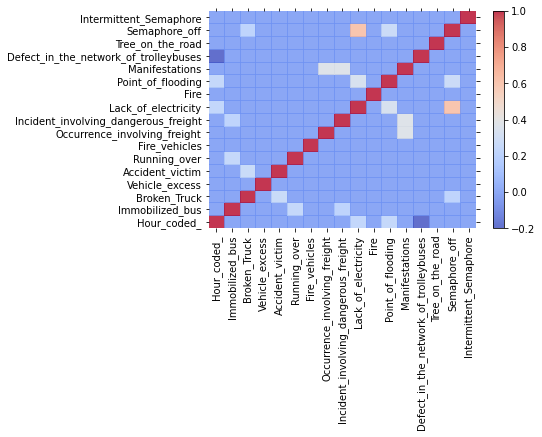

In [17]:
visualize_correlation_matrix(X, hurdle = 0.2)

In [18]:
corr = np.corrcoef(X.astype(float), rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [19]:
print(eigenvalues)

[2.20427951 1.65677375 1.42176742 0.31455813 0.39039805 0.49735869
 1.25429021 0.61643186 0.68518518 1.17548076 1.10927758 0.81954403
 0.8722385  1.0292599  1.01188577 0.96764033 0.97363035]


In [20]:
print(eigenvectors[:,3])

[-0.09258333  0.13719298 -0.14931924 -0.05537915  0.05111654  0.03601555
 -0.0081831  -0.12767178  0.00838644 -0.64425585  0.00479883  0.1828736
 -0.07723122 -0.22698991  0.03526445  0.64614866 -0.04608465]


In [21]:
print(variables[1], variables[2], variables[7], variables[9], variables[11], variables[13], variables[15])

Immobilized_bus Broken_Truck Occurrence_involving_freight Lack_of_electricity Point_of_flooding Defect_in_the_network_of_trolleybuses Semaphore_off


In [22]:
# Aplicando Padronização 
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_stds = standardization.scale_

In [23]:
Xst = np.column_stack((Xst, np.ones(observations)))
y = data['Slowness_in_traffic_percent'].values

In [24]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path                       

In [25]:
# Imprimindo o resultado
alpha = 0.01
w, path = optimize(Xst, y, alpha, eta =10**-12, iterations = 20000)
print("Coeficiente finais padronizados: " + ','.join(map(lambda x: "%0.4f" % x, w)))

Coeficiente finais padronizados: 25.0412,4.1195,1.1905,-6.4538,-3.2205,1.9098,3.4897,0.9894,0.3615,8.6253,-0.0389,10.9305,0.1576,-3.5300,-1.8354,0.4027,-0.4727,92.8519


In [26]:
# Desfazendo a padronização
unstandardized_betas = w[-1] / original_stds
unstandardized_bias = w[-1]-np.sum((original_means / original_stds) * w[-1]) 

In [27]:
# Imprimindo o Resultado
print('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta, varname in zip(unstandardized_betas, variables):
    print('%8s: %8.4f' % (varname, beta))

    bias: -474.7030
Hour_coded_:  11.9211
Immobilized_bus: 141.2624
Broken_Truck:  84.5379
Vehicle_excess: 547.5940
Accident_victim: 133.8824
Running_over: 268.8404
Fire_vehicles: 1082.8591
Occurrence_involving_freight: 1082.8591
Incident_involving_dangerous_freight: 1082.8591
Lack_of_electricity: 184.7382
    Fire: 1082.8591
Point_of_flooding: 130.7290
Manifestations: 418.7650
Defect_in_the_network_of_trolleybuses: 113.7948
Tree_on_the_road: 450.5613
Semaphore_off: 200.8237
Intermittent_Semaphore: 768.5702


In [28]:
# Criando o modelo
model = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [29]:
# Treinando o modelo com os dados não padronizados
model.fit(X, y)

LinearRegression(normalize=False)

In [30]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, model.coef_), data.columns[:-1]), reverse = True):
    print("%g.3f %s" % (coef,var))

40.6976.3f Fire_vehicles
38.0613.3f Vehicle_excess
17.161.3f Lack_of_electricity
15.3894.3f Point_of_flooding
11.5382.3f Occurrence_involving_freight
8.90629.3f Tree_on_the_road
6.26726.3f Immobilized_bus
5.52968.3f Running_over
4.64365.3f Accident_victim
4.3262.3f Defect_in_the_network_of_trolleybuses
4.21548.3f Incident_involving_dangerous_freight
3.91309.3f Intermittent_Semaphore
3.21499.3f Hour_coded_
1.0839.3f Broken_Truck
0.87092.3f Semaphore_off
0.710795.3f Manifestations
0.453991.3f Fire


In [31]:
# Padronizando os dados
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, model)

In [32]:
# Treinando o modelo com os dados padronizados
Stand_coef_linear_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=False))])

In [33]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), data.columns[:-1]), reverse = True):
    print("%g.3f %s" % (coef,var))

25.0412.3f Hour_coded_
10.9305.3f Point_of_flooding
8.62532.3f Lack_of_electricity
6.45379.3f Vehicle_excess
4.11947.3f Immobilized_bus
3.53.3f Defect_in_the_network_of_trolleybuses
3.48969.3f Fire_vehicles
3.22052.3f Accident_victim
1.90983.3f Running_over
1.83541.3f Tree_on_the_road
1.1905.3f Broken_Truck
0.989365.3f Occurrence_involving_freight
0.472745.3f Intermittent_Semaphore
0.402674.3f Semaphore_off
0.361464.3f Incident_involving_dangerous_freight
0.157603.3f Manifestations
0.0389283.3f Fire


### Usando o R2 

In [34]:
model = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [35]:
def r2_est(X,y):
    return r2_score(y, model.fit(X, y).predict(X))

In [36]:
print('Coeficiente R2: %0.3f' % r2_est(X, y))

Coeficiente R2: 0.524


In [37]:
# Impacto do R2 em cada atributo
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i !=j]
    r2_impact.append(((r2_est(X,y) - r2_est(X.values[:,selection],y)), data.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse = True):
        print('%6.3f %s' % (imp, varname))

 0.190 Hour_coded_
 0.037 Point_of_flooding
 0.016 Lack_of_electricity
 0.015 Vehicle_excess
 0.005 Immobilized_bus
 0.005 Fire_vehicles
 0.004 Defect_in_the_network_of_trolleybuses
 0.003 Accident_victim
 0.001 Tree_on_the_road
 0.001 Running_over
 0.000 Broken_Truck
 0.000 Occurrence_involving_freight
 0.000 Intermittent_Semaphore
 0.000 Incident_involving_dangerous_freight
 0.000 Semaphore_off
 0.000 Manifestations
 0.000 Fire
